In [2]:
import tensorflow as tf

# a. Створення тензорів

# Створення тензора-скаляра
scalar_tensor = tf.constant(42)
print("Scalar Tensor:")
print(scalar_tensor.numpy())
print()

# Створення тензора-вектора (з константами)
vector_tensor = tf.constant([1, 2, 3, 4])
print("Vector Tensor:")
print(vector_tensor.numpy())
print()

# Створення тензора-матриці (з випадковими значеннями)
matrix_tensor = tf.random.normal(shape=(3, 3), mean=0, stddev=1)
print("Matrix Tensor:")
print(matrix_tensor.numpy())
print()

# b. Операції з тензорами

# Операції додавання, віднімання, множення та ділення
tensor_a = tf.constant([[1, 2], [3, 4]])
tensor_b = tf.constant([[5, 6], [7, 8]])

add_result = tf.add(tensor_a, tensor_b)
subtract_result = tf.subtract(tensor_a, tensor_b)
multiply_result = tf.multiply(tensor_a, tensor_b)
divide_result = tf.divide(tensor_a, tensor_b)

print("Addition Result:")
print(add_result.numpy())
print()

print("Subtraction Result:")
print(subtract_result.numpy())
print()

print("Multiplication Result:")
print(multiply_result.numpy())
print()

print("Division Result:")
print(divide_result.numpy())
print()

# Застосування математичних функцій (синус, косинус)
sin_result = tf.math.sin(tf.dtypes.cast(tensor_a, tf.float32))
cos_result = tf.math.cos(tf.dtypes.cast(tensor_a, tf.float32))

print("Sine Result:")
print(sin_result.numpy())
print()

print("Cosine Result:")
print(cos_result.numpy())
print()

# c. Індексація та зрізи

# Звернення до окремих елементів та зріз тензора
element = tensor_a[0, 1].numpy()
slice_tensor = tensor_a[:, 1].numpy()

print("Element at [0, 1]:", element)
print("Slice from all rows, column 1:", slice_tensor)
print()

# d. Зміна форми тензора (решейп)
reshaped_tensor = tf.reshape(tensor_a, shape=(1, 4))

print("Original Tensor:")
print(tensor_a.numpy())
print("Reshaped Tensor:")
print(reshaped_tensor.numpy())



Scalar Tensor:
42

Vector Tensor:
[1 2 3 4]

Matrix Tensor:
[[ 0.38816825 -0.82845724  0.49258307]
 [-1.2596785  -1.4299482   0.29197633]
 [ 1.0069686  -1.2205474  -2.817041  ]]

Addition Result:
[[ 6  8]
 [10 12]]

Subtraction Result:
[[-4 -4]
 [-4 -4]]

Multiplication Result:
[[ 5 12]
 [21 32]]

Division Result:
[[0.2        0.33333333]
 [0.42857143 0.5       ]]

Sine Result:
[[ 0.84147096  0.9092974 ]
 [ 0.14112    -0.7568025 ]]

Cosine Result:
[[ 0.5403023  -0.41614684]
 [-0.9899925  -0.6536436 ]]

Element at [0, 1]: 2
Slice from all rows, column 1: [2 4]

Original Tensor:
[[1 2]
 [3 4]]
Reshaped Tensor:
[[1 2 3 4]]






7/7 [==============================] - 0s 1ms/step


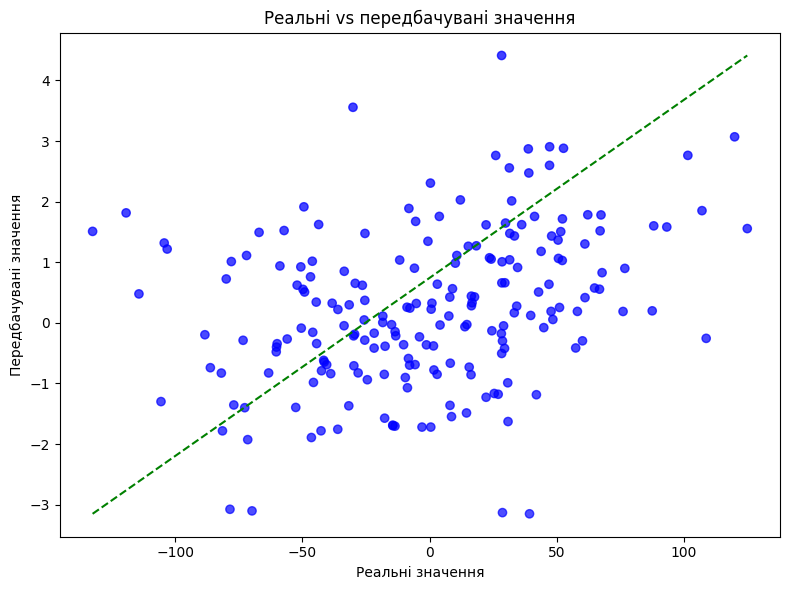

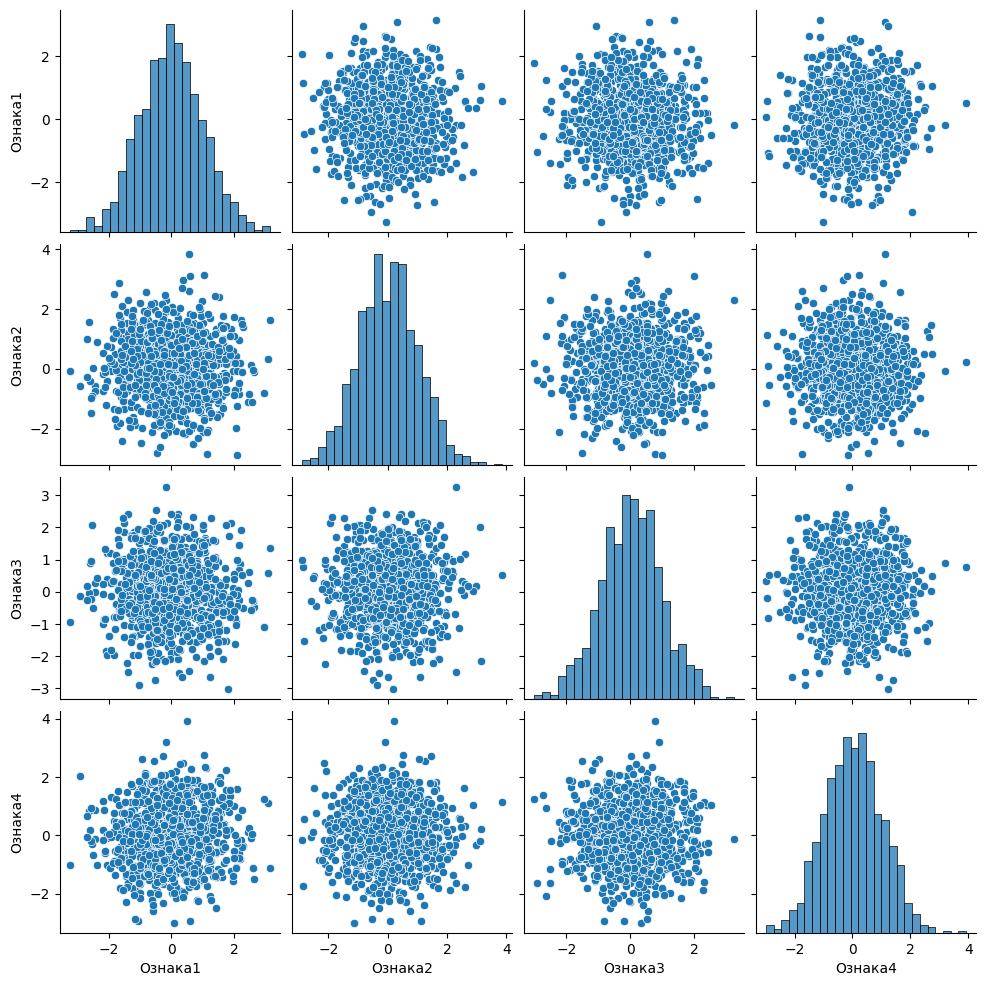

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

# Згенерувати синтетичний набір даних для задачі регресії
np.random.seed(0)
num_features = 4
X, y = make_regression(n_samples=1000, n_features=num_features, n_informative=1, noise=15, random_state=42)

data = pd.DataFrame(X, columns=[f"Ознака{i+1}" for i in range(num_features)])
data['Цільова змінна'] = y

data.to_csv('regression.csv', index=False)

# Розділити дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створити модель нейронної мережі для регресії
model_reg = Sequential()
model_reg.add(Dense(1, input_shape=(num_features,)))

# Вибрати функцію втрати та оптимізатор для навчання моделі регресії
model_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Навчити модель
history_reg = model_reg.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Візуалізація результатів регресії
y_pred = model_reg.predict(X_test)
plt.figure(figsize=(8, 6))
distance = np.abs(y_test - y_pred) 
max_distance = np.max(distance)
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)
    plt.scatter(y_test[i], y_pred[i], c="blue", alpha=alpha)
plt.xlabel("Реальні значення")
plt.ylabel('Передбачувані значення')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], ls='--', c ="green")
plt.title('Реальні vs передбачувані значення')
plt.tight_layout()
plt.show()

# Візуалізація даних
sns.pairplot(data[['Ознака1', 'Ознака2', 'Ознака3', 'Ознака4']])
plt.show()
